In [ ]:
2000-2024 T, P winter,spring -> SF winter,spring for anomalies 

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import cartopy.crs as ccrs
from matplotlib.colors import Normalize
from scipy.stats import linregress

In [6]:
# snowfall anomalies
sfds = xr.open_dataset('SF/sf_winter_2000_2024.nc')  # Replace with your file path
lats = sfds['latitude']
lons = sfds['longitude']
time = sfds['time']
sf = sfds['__xarray_dataarray_variable__'][:,:,:]

sf_ltm = sf.mean(axis=0)
print(sf_ltm.shape)

sf_anom = sf - sf_ltm
print(sf_anom.shape)

sf_anom_mean = sf_anom.mean(axis=0)
print(sf_anom_mean.shape)

(465, 705)
(25, 465, 705)
(465, 705)


In [8]:
sff_da = xr.DataArray(sf_anom, dims=("time", "latitude", "longitude"),
    coords={"time": sfds["time"], "latitude": sfds['latitude'], "longitude": sfds['longitude']})
sff_da.to_netcdf('SF/sf_winter_anom.nc')

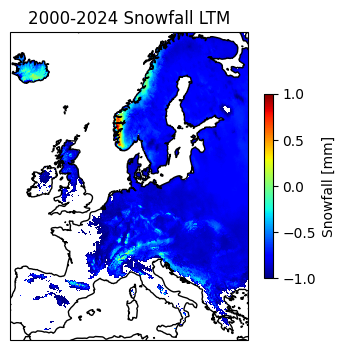

In [3]:
# Convert lons and lats to meshgrid
lons, lats = np.meshgrid(lons, lats)

# Define plot extent and center
min_lat, max_lat = 35, 71
min_lon, max_lon = -8, 25
clon, clat = (min_lon + max_lon) / 2, (min_lat + max_lat) / 2
europe_bbox = [min_lon, max_lon, min_lat, max_lat]

# Create the figure and axis
fig, ax = plt.subplots(
    figsize=(4, 4), subplot_kw={'projection': ccrs.Orthographic(central_latitude=clat, central_longitude=clon)}
)
ax.set_extent(europe_bbox, crs=ccrs.PlateCarree())
ax.set_title('2000-2024 Snowfall LTM', fontsize=12)

# Add coastlines
ax.coastlines()

# Plot the snowfall data
c1 = ax.pcolormesh(lons, lats, sf_ltm, cmap="jet", transform=ccrs.PlateCarree())

# Add colorbar
sm = ScalarMappable(cmap='jet', norm=Normalize(vmin=-1, vmax=1))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', shrink=0.6, label='Snowfall [mm]')
cbar.ax.tick_params(labelsize=10)

plt.show()

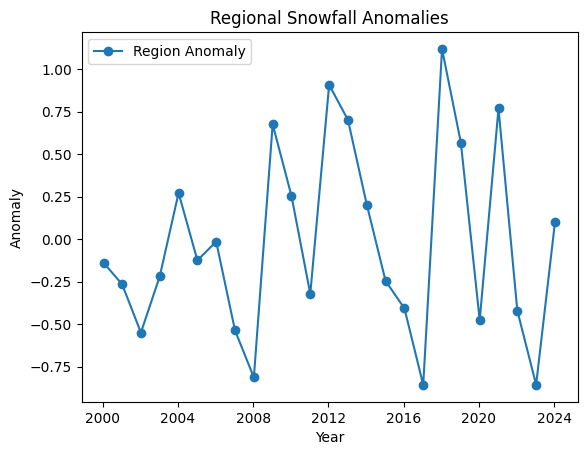

In [4]:
region_anom = sf_anom.sel(latitude=slice(46, 48), longitude=slice(5, 15)) # regional anomalies at alps
region_mean = region_anom.mean(dim=['latitude', 'longitude'])
region_mean.plot.line(marker='o', label='Region Anomaly')
plt.title('Regional Snowfall Anomalies')
plt.ylabel('Anomaly')
plt.xlabel('Year')
plt.legend()
plt.show()